In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import glob

In [4]:
dataframes = []
labels = []

# Adjust this path and filenames as needed
for file in glob.glob("data/*.csv"):
    df = pd.read_csv(file)
    # Use the column names (excluding 'Wavelength') as sample labels
    sample_label = [col for col in df.columns if col != 'Wavelength']
    
    # transpose to make rows = samples, columns = wavelengths
    df_samples = df.drop(columns='Wavelength').T
    df_samples.columns = df['Wavelength']
    
    dataframes.append(df_samples)
    labels.extend([sample_label] * df_samples.shape[0])

In [14]:
# Combine all samples into one DataFrame
X = pd.concat(dataframes)
y = np.unique(np.array(labels))
print(X)

Wavelength               415   445  480   515   555   590   630   680  910
All-Purpose Flour        110   798  666  1146  1301  1313  1295   913  172
Almond Flour              82   506  460   844   992  1024  1035   743  134
Bread Flour              117   833  696  1186  1344  1344  1334   924  168
Cake Flour               121   867  720  1231  1391  1386  1367   946  177
Cashew Milk Powder       100   684  592  1054  1210  1230  1217   869  173
Chickpea Flour           100   626  549  1051  1229  1263  1256   886  165
Coconut Milk Powder      121   867  733  1249  1411  1397  1366   941  174
Cornstarch               135  1021  831  1411  1563  1539  1498  1031  205
Gluten-Free Flour Blend  112   806  681  1165  1324  1328  1309   915  174
Goat Milk Powder         134   873  774  1410  1614  1644  1628  1077  213
Non-Fat Milk Powder      116   785  687  1233  1406  1409  1387   945  189
Rice Flour               118   871  725  1231  1371  1368  1342   928  183
Soy Milk Powder          

In [6]:
print(f"Shape of X: {X.shape}")
print(f"Example labels: {y}")

Shape of X: (17, 9)
Example labels: ['All-Purpose Flour' 'Almond Flour' 'Bread Flour' 'Cake Flour'
 'Cashew Milk Powder' 'Chickpea Flour' 'Coconut Milk Powder' 'Cornstarch'
 'Gluten-Free Flour Blend' 'Goat Milk Powder' 'Non-Fat Milk Powder'
 'Rice Flour' 'Soy Milk Powder' 'Tapioca Flour' 'Unknown Powder'
 'Whole Milk Powder' 'Whole Wheat Flour']


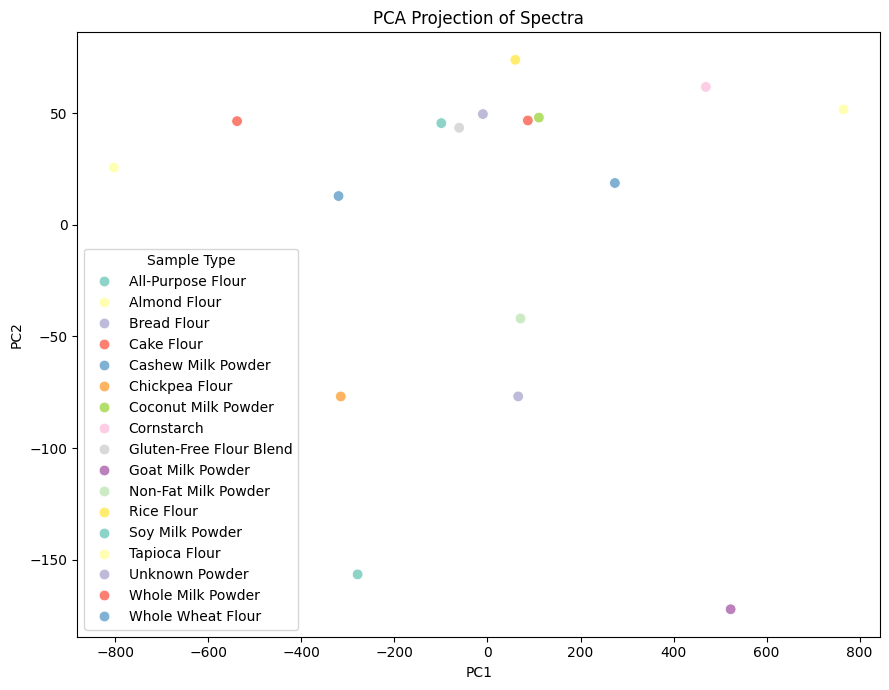

In [16]:
# 🔍 Step 2: Preprocess the Data
# Standardize features (important for distance-based models like KNN)
scaler = StandardScaler()
X_scaled = X
# 🎨 Step 3: Visualize Using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(9, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set3", s=60)
plt.title("PCA Projection of Spectra")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Sample Type")
plt.tight_layout()
plt.show()

In [21]:
# 🧠 Step 4: Train a K-Nearest Neighbors Classifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Accuracy: 0.00


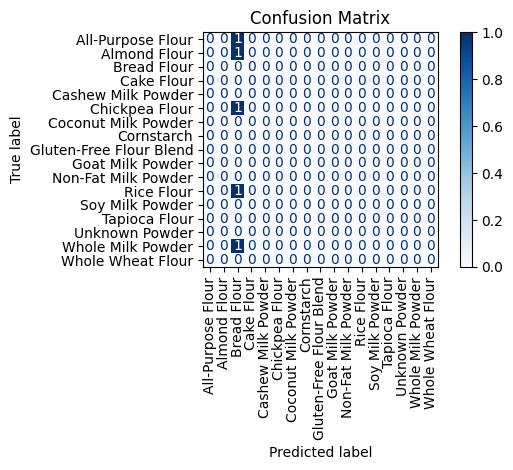

In [22]:
# 📊 Step 5: Evaluate the Model
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()